In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import math
import statistics
import operator
import matplotlib.pyplot as plt
import traitlets
from IPython.display import display
from ipywidgets import widgets
from tkinter import Tk, filedialog


class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectFilesButton, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.
        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"
my_button_1 = SelectFilesButton()
my_button_1


SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [6]:
main_dict = pd.read_csv(my_button_1.files[0]).loc[ : , ["Input.text","Answer.Label", "Answer.Severity", "Answer.isStress"]]

In [7]:
counts_dictionary = {}
for label in main_dict['Answer.Label'].tolist():
    if '|' in label:
        if label not in counts_dictionary:
            counts_dictionary[label] = 0
        counts_dictionary[label] += 1

In [8]:
dictionary_items = counts_dictionary.items()

dict_tuples = sorted([item for item in counts_dictionary.items()], key=lambda item: item[1], reverse=True)

In [9]:
sortednew_dict = {}
for pair in dict_tuples:
    sortednew_dict[pair[0]] = pair[1]

In [10]:
new_dict = {'stressor': [], 'count': []}
for label in sortednew_dict:
    new_dict['stressor'].append(label)
    new_dict['count'].append(counts_dictionary[label])

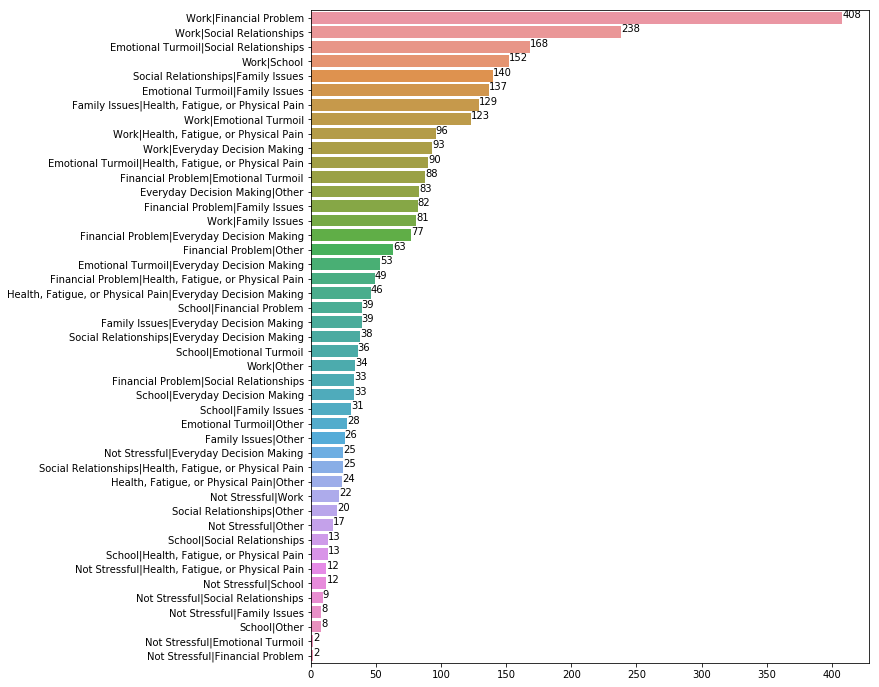

In [11]:
values = list(sortednew_dict.values())
plt.subplots(figsize = (10,12))
sns.barplot(x='count', y='stressor', data=new_dict)
for index, value in enumerate(values):
        plt.text(value, index, str(value))